# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

In [6]:
#Imports
import pickle
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import pandas as pd
import tensorflow as tf
from tensorflow.contrib.layers import flatten

---
## Step 0: Load The Data

In [7]:
# Load pickled data

training_file = './traffic-signs-data/train.p'
testing_file = './traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)

# Non-normalized training and testing images    
X_train_non_normalized, y_train = train['features'], train['labels']
X_test_non_normalized, y_test = test['features'], test['labels']



---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [8]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = X_train_non_normalized.shape[0]

# TODO: Number of testing examples.
n_test = X_test_non_normalized.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_train_non_normalized[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = np.unique(y_test).shape[0]



print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)


Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

In [9]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
# Visualizations will be shown in the notebook.



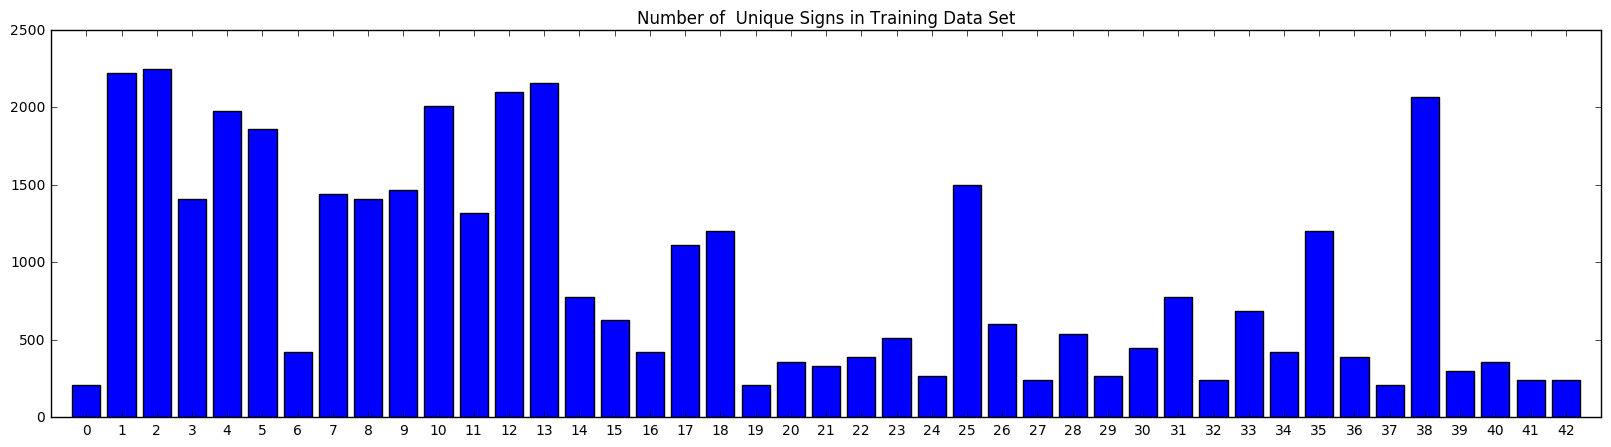

In [11]:
# Get the unique classes and their individual counts
n_classes, count = np.unique(y_train, return_counts=True)

plt.rcParams["figure.figsize"] = [20, 5]
axes = plt.gca()
axes.set_xlim([-1,43])

plt.bar(n_classes, count, tick_label=n_classes, width=0.8, align='center')
plt.title('Number of  Unique Signs in Training Data Set')
# Save the image and then plot it
plt.savefig('train_hist.png', transparent=True, bbox_inches='tight', pad_inches=0)
plt.show()

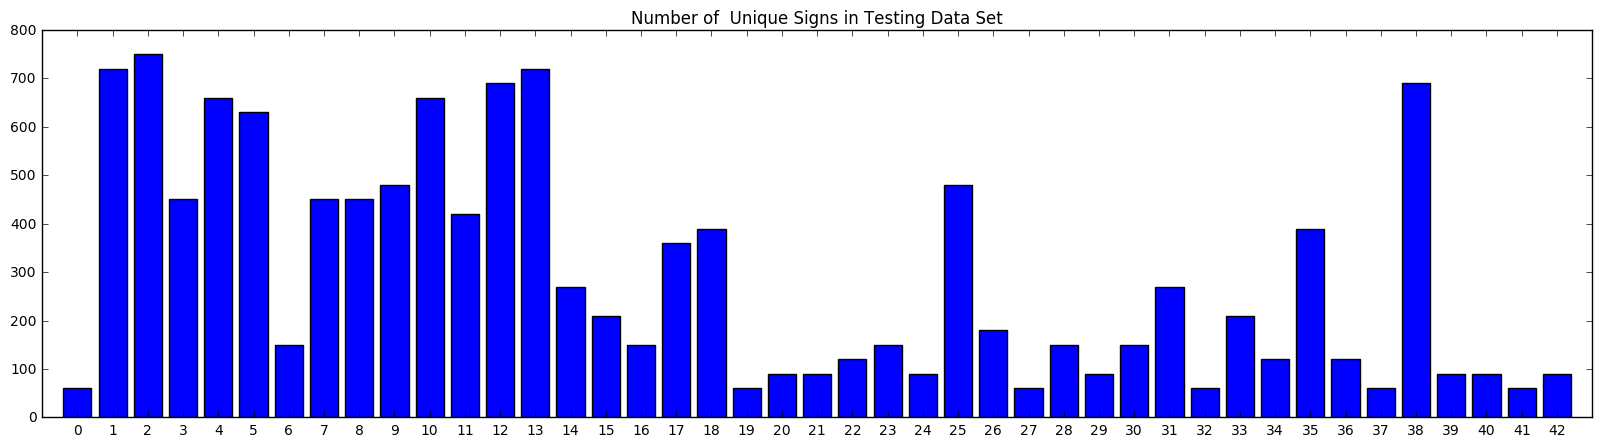

In [13]:

n_classes, count = np.unique(y_test, return_counts=True)

plt.rcParams["figure.figsize"] = [20, 5]
axes = plt.gca()
axes.set_xlim([-1,43])

plt.bar(n_classes, count, tick_label=n_classes, width=0.8, align='center')
plt.title('Number of  Unique Signs in Testing Data Set')
plt.savefig('test_hist.png', transparent=True, bbox_inches='tight', pad_inches=0)
plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Pre-process the Data Set (normalization, grayscale, etc.)

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [14]:
X_train = []
X_test = [] 

'''
This function takes in an array of images
and returns the normalized image using OpenCV's normalize function
'''
def normalize_images(images):
    norm_images = []
    zeros = np.zeros((32,32,3))
    for i, image in enumerate(images):
        norm_image = cv2.normalize(image, zeros, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
        norm_images.append(norm_image)
    return norm_images

X_train = normalize_images(X_train_non_normalized)
X_test = normalize_images(X_test_non_normalized)

In [15]:
# Split the training data into training set and validation set.
X_train_pre_processed, X_validation, y_train_pre_processed, y_validation = train_test_split(X_train, y_train, test_size=0.33, random_state=0)

### Model Architecture

In [16]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
import tensorflow as tf
from tensorflow.contrib.layers import flatten
EPOCHS = 20
BATCH_SIZE = 128
dropout = 0.75
rate = 0.001

In [17]:

# Create helper functions for simplicity
def conv2d(x, W, b, strides=1):
    # Conv2D wrapper, with bias and relu activation
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding='VALID')
    x = tf.nn.bias_add(x, b)
    return tf.nn.relu(x)


def maxpool2d(x, k=2):
    # MaxPool2D wrapper
    return tf.nn.max_pool(x, ksize=[1, k, k, 1], strides=[1, k, k, 1],
                          padding='VALID')

In [18]:
mu = 0
sigma = 0.1

weights = {'W_conv1':tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean = mu, stddev = sigma)),
           'W_conv2':tf.Variable(tf.truncated_normal(shape=(5,5,6,16), mean = mu, stddev = sigma)),
           'W_fc1':tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma)),
           'W_fc2':tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma)),
           'W_out':tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))}
biases = {'b_conv1':tf.Variable(tf.zeros(6)),
          'b_conv2':tf.Variable(tf.zeros(16)),
          'b_fc1':tf.Variable(tf.zeros(120)),
          'b_fc2':tf.Variable(tf.zeros(84)),
          'b_out':tf.Variable(tf.zeros(43))}

In [19]:


def LeNets(x,weights,biases):    
    
    # Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6. 
    # Activation.
    conv1 = conv2d(x, weights['W_conv1'],  biases['b_conv1'], strides=1)
    # Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = maxpool2d(conv1, k=2)
    # Layer 2: Convolutional. Output = 10x10x16.
    conv2 = conv2d(conv1, weights['W_conv2'],  biases['b_conv2'], strides=1)

    # Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = maxpool2d(conv2, k=2)

    # Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1   = tf.matmul(fc0, weights['W_fc1']) + biases['b_fc1']
    
    # Activation.
    fc1    = tf.nn.relu(fc1)
    fc1 = tf.nn.dropout(fc1, dropout)

    # Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2    = tf.matmul(fc1, weights['W_fc2']) +  biases['b_fc2']
    
    # Activation.
    fc2    = tf.nn.relu(fc2)
    
    fc2 = tf.nn.dropout(fc2, dropout)

    # Layer 5: Fully Connected. Input = 84. Output = 43.
    logits = tf.matmul(fc2, weights['W_out']) + biases['b_out']
    
    return logits

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the test set but low accuracy on the validation set implies overfitting.

In [20]:

x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32) 
one_hot_y = tf.one_hot(y, 43)

rate = 0.001
EPOCHS = 100
BATCH_SIZE = 128

logits = LeNets(x,weights,biases)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits = logits, labels = one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [21]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)

    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.5})

        validation_accuracy = evaluate(X_validation, y_validation)
        if i%10 == 0:
            print("EPOCH {} ...".format(i+1))
            print("Validation Accuracy = {:.3f}".format(validation_accuracy))
            print()

    saver.save(sess, 'model')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.722

EPOCH 11 ...
Validation Accuracy = 0.978

EPOCH 21 ...
Validation Accuracy = 0.988

EPOCH 31 ...
Validation Accuracy = 0.992

EPOCH 41 ...
Validation Accuracy = 0.995

EPOCH 51 ...
Validation Accuracy = 0.995

EPOCH 61 ...
Validation Accuracy = 0.995

EPOCH 71 ...
Validation Accuracy = 0.997

EPOCH 81 ...
Validation Accuracy = 0.995

EPOCH 91 ...
Validation Accuracy = 0.997

Model saved


In [22]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.943


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [23]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
from os import listdir
from os.path import isfile, join

mypath='./traffic-signs-web/'
onlyfiles = [ f for f in listdir(mypath) if isfile(join(mypath,f)) ]
images_RGB = np.empty(len(onlyfiles), dtype=object)
for n in range(0, len(onlyfiles)):
    images_RGB[n] = cv2.imread( join(mypath,onlyfiles[n]) )

In [24]:
%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
images = []
for i,image in enumerate(images_RGB):
    img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (32,32))
    images.append(img)  
    

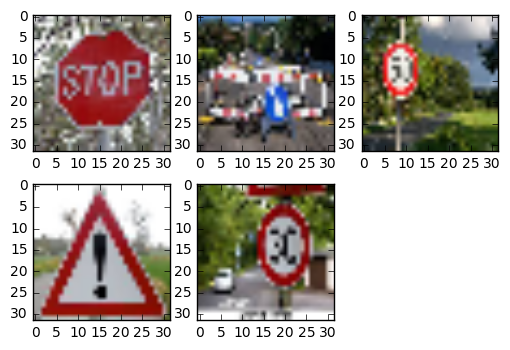

In [25]:
fig = plt.figure()
for i, image in enumerate(images):
    ax1 = fig.add_subplot(2,3,i+1)
    ax1.imshow(image)

In [26]:
y_test_from_Web = [14,35,2,18,1]

### Predict the Sign Type for Each Image

In [27]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

images_normalized = []
images_normalized = normalize_images(images) 


In [28]:
signs_df = pd.read_csv("signnames.csv")

In [29]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    logits = LeNets(x,weights,biases)
    predictions = tf.argmax(logits, 1)
    lgts, preds = sess.run([logits, predictions], feed_dict={x: images_normalized, keep_prob: 1.})

In [30]:
for i in y_test_from_Web:
    print("Correct Label:", signs_df['SignName'][i])

Correct Label: Stop
Correct Label: Ahead only
Correct Label: Speed limit (50km/h)
Correct Label: General caution
Correct Label: Speed limit (30km/h)


In [31]:
for i in preds:
    print("The CNN predicted:", signs_df['SignName'][i])

The CNN predicted: Stop
The CNN predicted: Ahead only
The CNN predicted: End of speed limit (80km/h)
The CNN predicted: General caution
The CNN predicted: Wild animals crossing


### Analyze Performance

In [32]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(images_normalized, y_test_from_Web)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.600


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [33]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
with tf.Graph().as_default(), tf.Session() as sess:
    logits = tf.placeholder('float', [None, 43])
    softmax = tf.nn.softmax(logits)
    k_val, k_id = tf.nn.top_k(softmax, k=5)
    
    k_vals, k_ids = sess.run([k_val, k_id], feed_dict={logits: lgts})

In [34]:
print(k_vals)

[[  1.00000000e+00   5.86573012e-11   1.37200459e-11   2.85149237e-14
    2.61310914e-15]
 [  9.34661984e-01   5.44197299e-02   4.88297269e-03   2.11329712e-03
    1.84845494e-03]
 [  4.82066512e-01   3.83125335e-01   4.86794002e-02   4.08039130e-02
    2.33788770e-02]
 [  1.00000000e+00   2.65133705e-36   0.00000000e+00   0.00000000e+00
    0.00000000e+00]
 [  9.99971628e-01   2.69695192e-05   7.80788639e-07   4.34307083e-07
    2.07676734e-07]]


Labes for image 1


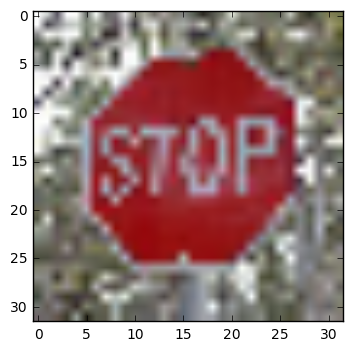

Predicted: Stop
Predicted: No entry
Predicted: Bicycles crossing
Predicted: Speed limit (30km/h)
Predicted: Yield
Labes for image 2


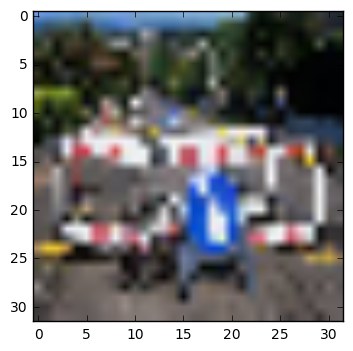

Predicted: Ahead only
Predicted: Speed limit (20km/h)
Predicted: Go straight or left
Predicted: Yield
Predicted: Children crossing
Labes for image 3


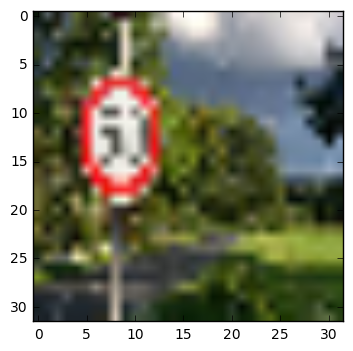

Predicted: End of speed limit (80km/h)
Predicted: Speed limit (30km/h)
Predicted: Right-of-way at the next intersection
Predicted: Priority road
Predicted: End of all speed and passing limits
Labes for image 4


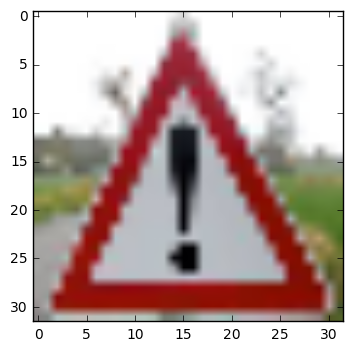

Predicted: General caution
Predicted: Speed limit (70km/h)
Predicted: Speed limit (20km/h)
Predicted: Speed limit (30km/h)
Predicted: Speed limit (50km/h)
Labes for image 5


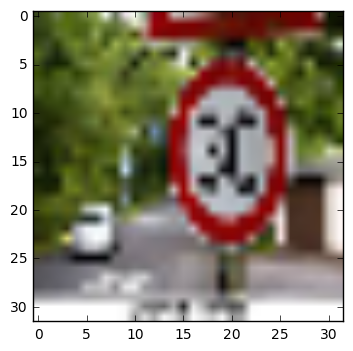

Predicted: Wild animals crossing
Predicted: Double curve
Predicted: Speed limit (50km/h)
Predicted: Stop
Predicted: Road work


In [35]:
for i in range(len(k_ids)):
    print("Labes for image", i+1)
    plt.imshow(images[i])
    plt.show()
    for j in range(len(k_ids[i])):
        print("Predicted:", signs_df['SignName'][k_ids[i][j]])



> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the IPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 